# Happiness

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


In [3]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [4]:
data = pd.read_csv('/Users/erinbogenschutz/Portfolio/World Happiness Project/World-happiness-report-2024.csv')

In [5]:
data.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [11]:
data_columns = ['Country name', 'Regional indicator', 'Ladder score', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

In [12]:
data = data[data_columns].copy()

In [8]:
happy_df = data.rename({'Country name':'country_name', 'Regional indicator':'regional_indicator', 'Ladder score':'ladder_score', 'Log GDP per capita':'log_gdp_per_capita', 'Social support':'social_support','Healthy life expectancy':'healthy_life_expectancy',
                       'Freedom to make life choices':'freedom_to_make_life_choices','Generosity':'generosity', 'Perceptions of corruption':'perceptions_of_corruption'},axis = 1)

In [14]:
happy_df.head()

,country_name,regional_indicator,ladder_score,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.741,1.844,1.572,0.695,0.859,0.142,0.546
1,Denmark,Western Europe,7.583,1.908,1.520,0.699,0.823,0.204,0.548
2,Iceland,Western Europe,7.525,1.881,1.617,0.718,0.819,0.258,0.182
3,Sweden,Western Europe,7.344,1.878,1.501,0.724,0.838,0.221,0.524
4,Israel,Middle East and North Africa,7.341,1.803,1.513,0.740,0.641,0.153,0.193


In [15]:
happy_df.isnull().sum()

country_name                    0
regional_indicator              0
ladder_score                    0
log_gdp_per_capita              3
social_support                  3
healthy_life_expectancy         3
freedom_to_make_life_choices    3
generosity                      3
perceptions_of_corruption       3
dtype: int64

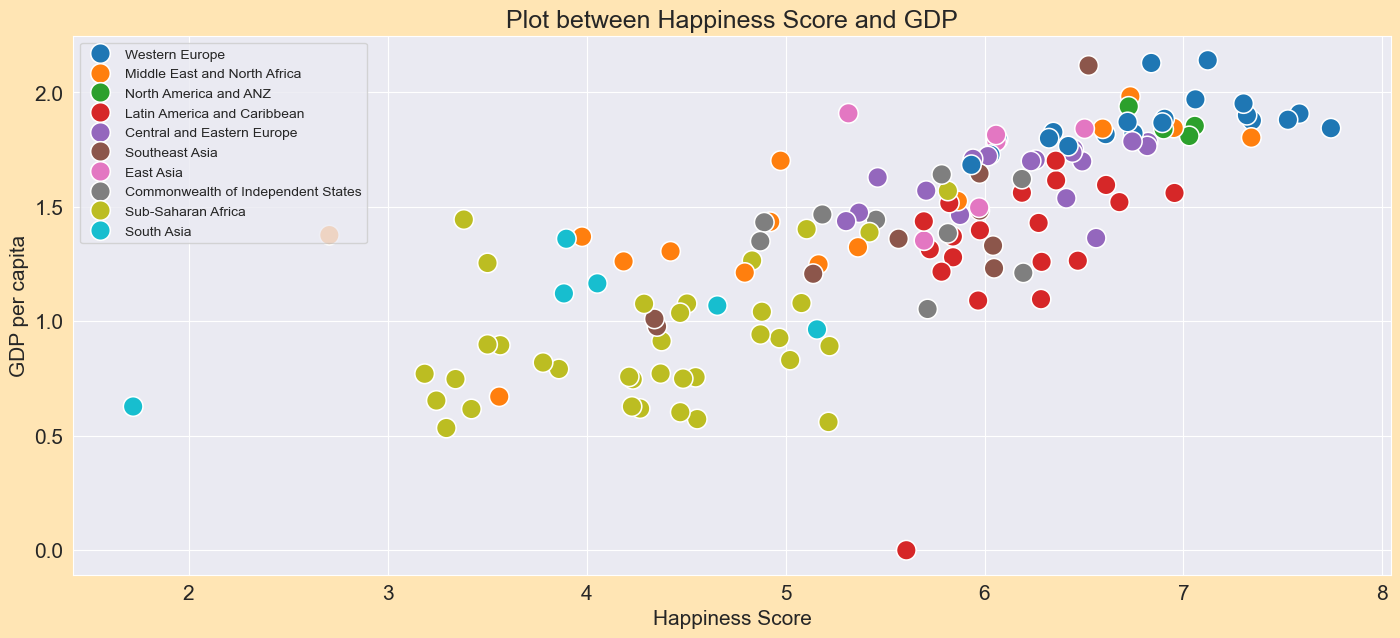

In [16]:
#plot between happiness and gdp
plt.rcParams['figure.figsize'] = (17, 7)
plt.title("Plot between Happiness Score and GDP")

sns.scatterplot(
    data=happy_df,
    x='ladder_score',
    y='log_gdp_per_capita',
    hue='regional_indicator',
    s=200,  
)

plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')
plt.show()



In [17]:
gdp_region = happy_df.groupby('regional_indicator')['log_gdp_per_capita'].sum()
gdp_region

regional_indicator
Central and Eastern Europe            27.842
Commonwealth of Independent States    12.609
East Asia                             10.202
Latin America and Caribbean           25.236
Middle East and North Africa          21.908
North America and ANZ                  7.443
South Asia                             6.311
Southeast Asia                        12.369
Sub-Saharan Africa                    31.646
Western Europe                        37.467
Name: log_gdp_per_capita, dtype: float64

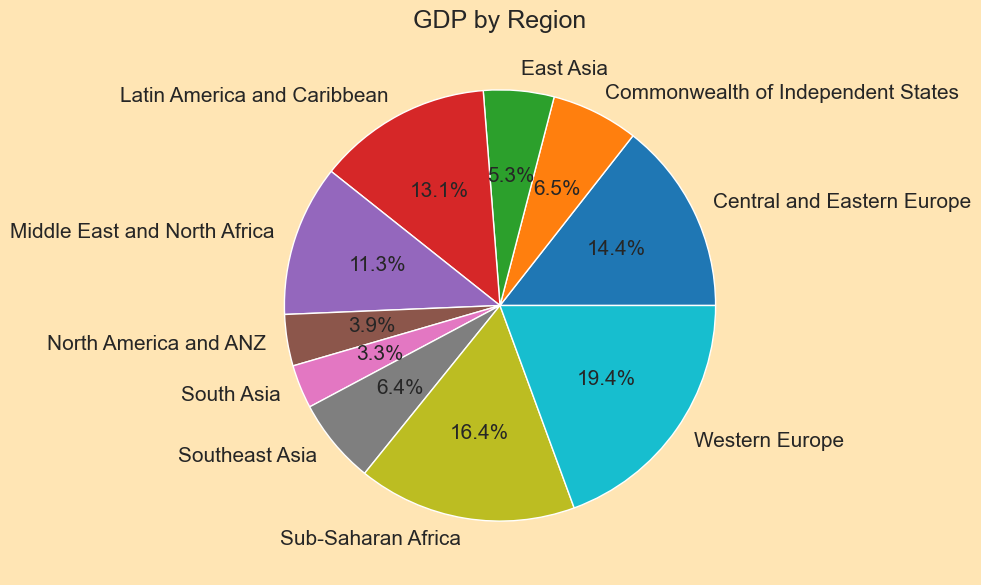

In [18]:
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')
plt.show()

In [41]:
# Total countries per region
total_country = happy_df.groupby('regional_indicator')[['country_name']].count()
print(total_country)


                                    country_name
regional_indicator                              
Central and Eastern Europe                    17
Commonwealth of Independent States            10
East Asia                                      6
Latin America and Caribbean                   19
Middle East and North Africa                  17
North America and ANZ                          4
South Asia                                     6
Southeast Asia                                 9
Sub-Saharan Africa                            35
Western Europe                                20


In [ ]:
# correlation map 

cor = happy_df.select_dtypes(include=['number']).corr(method="pearson")


# Create mask (optional, but helps hide upper triangle)
mask = np.zeros_like(cor, dtype=bool)

# Plot heatmap
f, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(
    cor,
    mask=mask,
    cmap="Blues",
    square=True,
    ax=ax,
    annot=True,       # optional: show correlation values
    fmt=".2f",        # format numbers to 2 decimals
)
plt.title("Correlation Heatmap of Happiness Data")
plt.show()

In [ ]:
#corruption in regions 

corruption = happy_df.groupby('regional_indicator')[['perceptions_of_corruption']].mean()
corruption

In [ ]:
plt.rcParams['figure.figsize']= (12,8)
plt.title('Perception of Corruption in various regions')
plt.xlabel('Regions', fontsize = 15)
plt.ylabel('Corruption index', fontsize = 15)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(corruption.index, corruption.perceptions_of_corruption)
plt.show()

In [44]:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)
print(bottom_10)

         country_name            regional_indicator  ladder_score  \
133            Zambia            Sub-Saharan Africa         3.502   
134          Eswatini            Sub-Saharan Africa         3.502   
135            Malawi            Sub-Saharan Africa         3.421   
136          Botswana            Sub-Saharan Africa         3.383   
137          Zimbabwe            Sub-Saharan Africa         3.341   
138  Congo (Kinshasa)            Sub-Saharan Africa         3.295   
139      Sierra Leone            Sub-Saharan Africa         3.245   
140           Lesotho            Sub-Saharan Africa         3.186   
141           Lebanon  Middle East and North Africa         2.707   
142       Afghanistan                    South Asia         1.721   

     log_gdp_per_capita  social_support  healthy_life_expectancy  \
133               0.899           0.809                    0.264   
134               1.255           0.925                    0.176   
135               0.617           0.

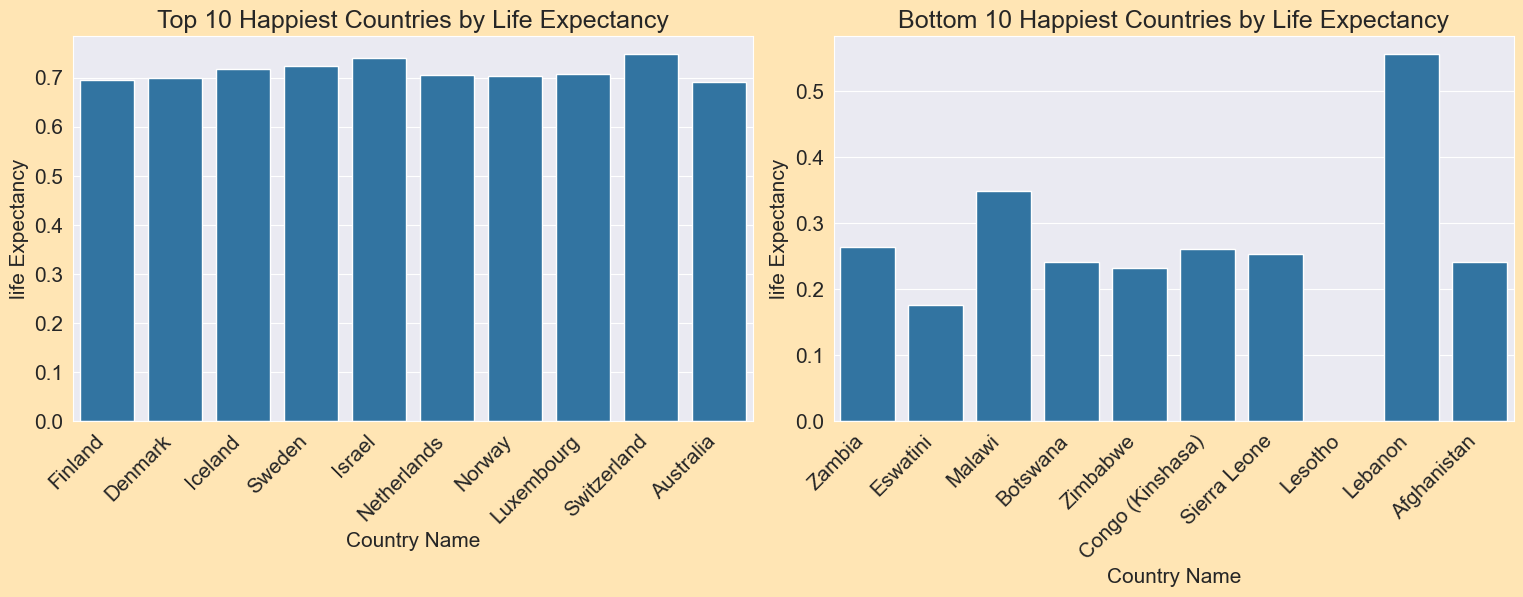

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

xlabels = top_10["country_name"]

axes[0].set_title('Top 10 Happiest Countries by Life Expectancy')
axes[0].set_xticks(range(len(xlabels)))
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')

plt.tight_layout(pad=2)

sns.barplot(x = top_10.country_name, y = top_10.healthy_life_expectancy, ax = axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('life Expectancy')

xlabels = bottom_10.country_name
axes[1].set_title('Bottom 10 Happiest Countries by Life Expectancy')
axes[1].set_xticks(range(len(xlabels)))
axes[1].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x = bottom_10.country_name, y = bottom_10.healthy_life_expectancy, ax = axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('life Expectancy')

plt.show()


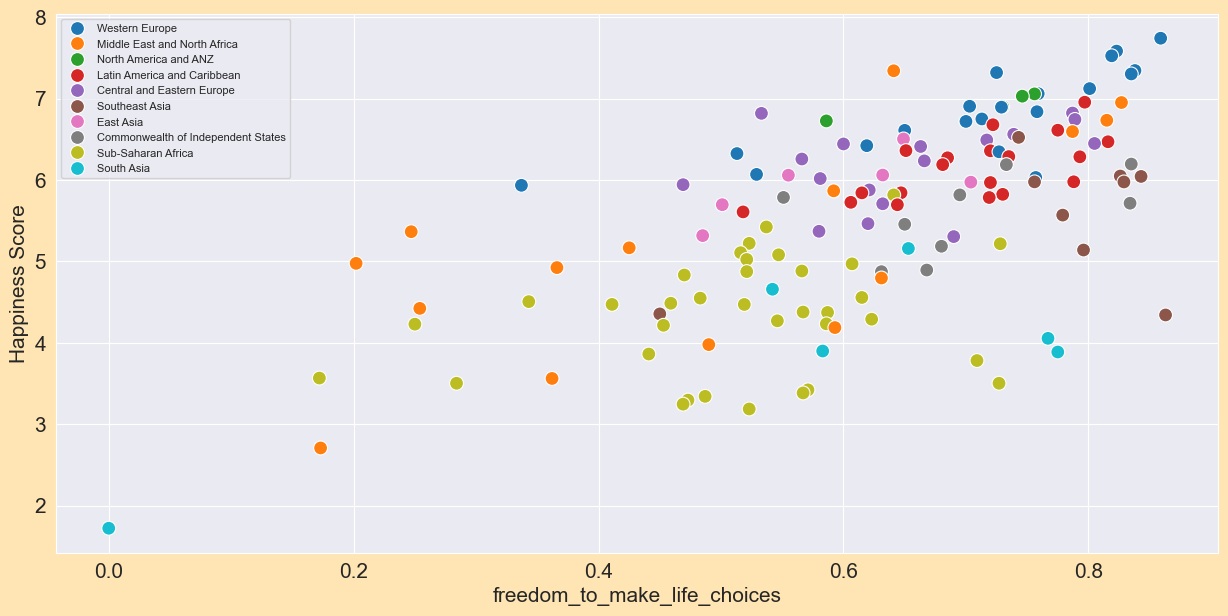

In [56]:
plt.rcParams['figure.figsize']= (15,7)
sns.scatterplot(x = happy_df.freedom_to_make_life_choices, y = happy_df.ladder_score, hue = happy_df.regional_indicator, s= 100)
plt.legend(loc = 'upper left', fontsize = '8')
plt.xlabel = 'Freedom to make life choices'
plt.ylabel('Happiness Score')
plt.show()

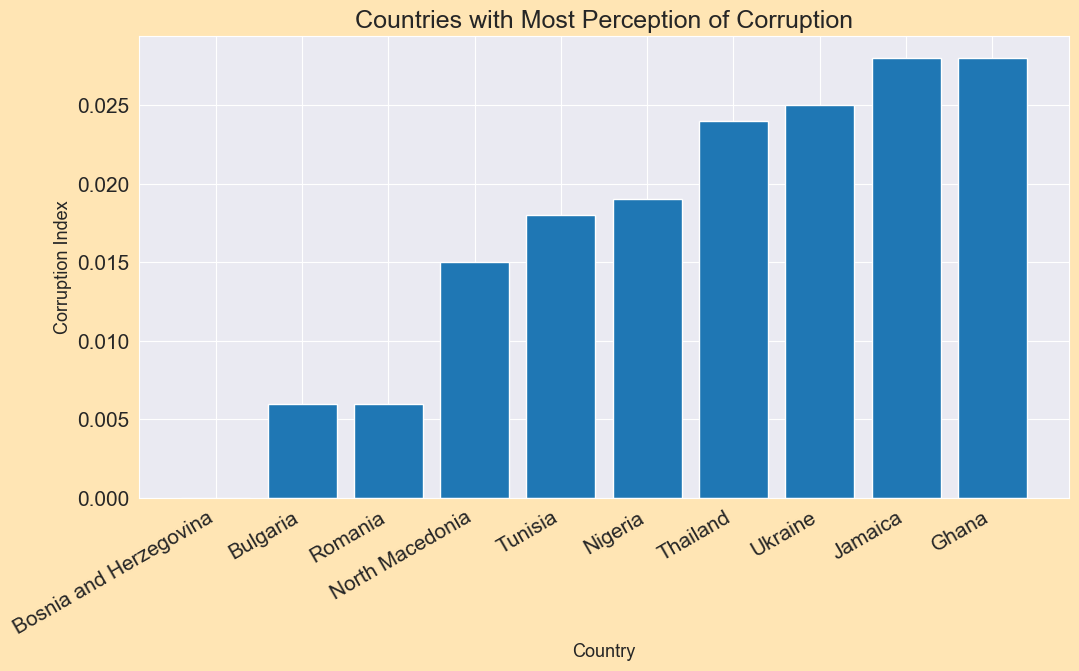

In [9]:
country = happy_df.sort_values(by='perceptions_of_corruption').head(10)

plt.rcParams['figure.figsize'] = (12, 6)
plt.title('Countries with Most Perception of Corruption')
plt.xlabel("Country", fontsize=13)
plt.ylabel("Corruption Index", fontsize=13)
plt.xticks(rotation=30, ha='right')

plt.bar(country["country_name"], country["perceptions_of_corruption"])
plt.show()


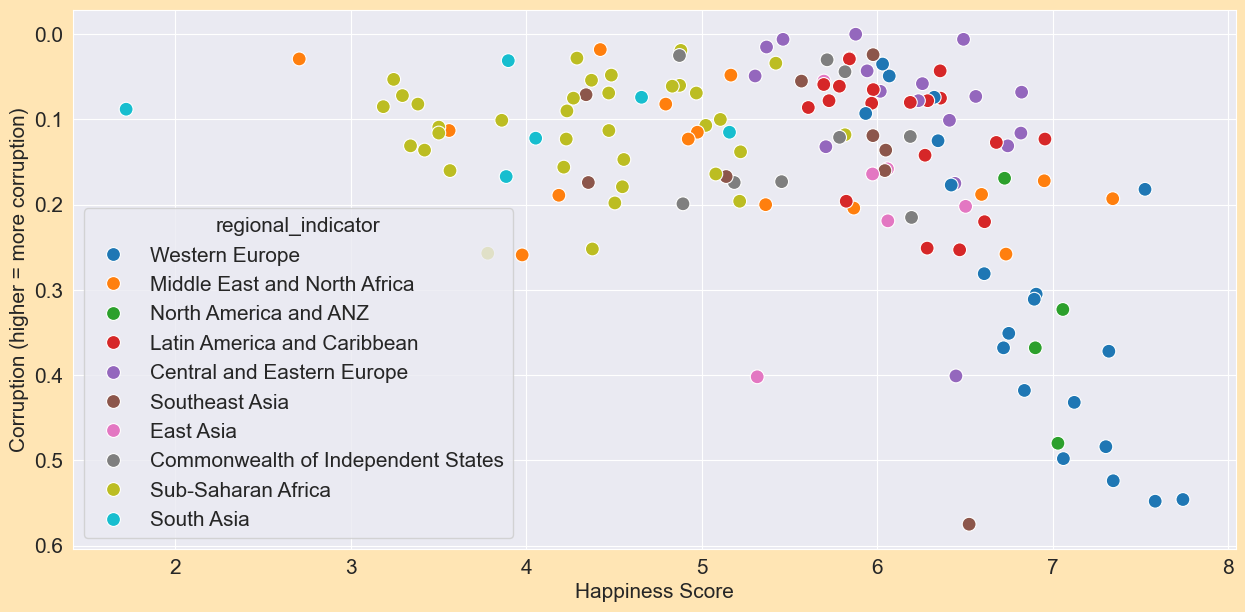

In [24]:
sns.scatterplot(
    x=happy_df.ladder_score,
    y=happy_df.perceptions_of_corruption,
    hue=happy_df.regional_indicator,
    s=100
)

plt.gca().invert_yaxis()
plt.ylabel("Corruption (higher = more corruption)")
plt.xlabel("Happiness Score")
plt.show()
